In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



# analysis

In [2]:
datasetName = '/stor/public/hcad/Bronchi_NA_HCLAdultTrachea2/Bronchi_NA_HCLAdultTrachea2'

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv"),header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [5]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
dataobj

An object of class Seurat 
24990 features across 9949 samples within 1 assay 
Active assay: RNA (24990 features, 0 variable features)

In [7]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [8]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  IGFBP7, DCN, VIM, MGP, MT2A, LUM, IFITM3, SPARC, A2M, SLC2A3 
	   APOD, SPARCL1, GNG11, SPRY1, AQP1, PMP22, SOCS3, PLPP3, COL1A2, CCDC80 
	   TIMP3, GJA1, IFI27, ACKR1, FN1, C1S, COL6A3, C1R, SELE, PLVAP 
Negative:  SAA1, ALDH1A3, LCN2, MMP7, SCGB3A1, CXCL1, WFDC21P, SAA2, TCN1, SERPINA3 
	   RARRES1, KRT23, AGR2, LMO7, DEFB1, MT-CO1, BPIFB1, SLC34A2, ACTB, MT-CO3 
	   PI3, CD55, PRSS8, CCL28, TMPRSS2, PRR4, LYZ, S100A14, S100A2, MUC5B 
PC_ 2 
Positive:  DCN, MGP, LUM, FN1, APOD, PRELP, BGN, PLA2G2A, CCDC80, HAPLN1 
	   FMOD, COL1A2, MT1E, C1S, SCRG1, ACAN, CHAD, FBLN1, COL6A3, COL2A1 
	   C2orf40, COL6A2, MFAP4, MMP2, MATN3, COL11A1, CTSK, C2orf82, MMP3, SERPINF1 
Negative:  AQP1, SELE, ACKR1, PLVAP, PCAT19, CD93, ADAMTS9, S1PR1, GJA1, STC1 
	   PECAM1, CALCRL, TM4SF1, CD74, ADGRL4, B2M, THBD, IFI27, SERPINE1, DUSP6 
	   UPP1, FLT1, HLA-DRA, ESAM, TSPAN7, SOX7, SPRY1, GNG11, EMCN, CNKSR3 
PC_ 3 
Positive:  FCER1G, C1QB, TYROBP, CCL3, AIF1, BCL2A1, GPR183, IL1B, RGS1,

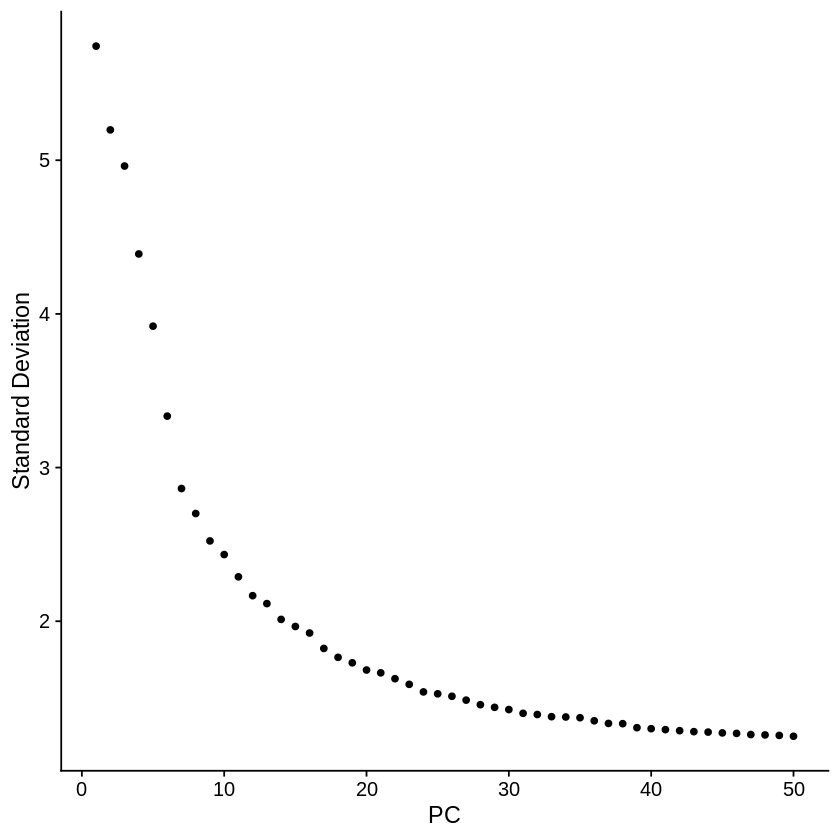

In [10]:
ElbowPlot(dataobj,50) 

In [11]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:20:08 UMAP embedding parameters a = 0.9922 b = 1.112

14:20:08 Read 9949 rows and found 30 numeric columns

14:20:08 Using Annoy for neighbor search, n_neighbors = 30

14:20:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

14:20:10 Writing NN index file to temp file /tmp/RtmpNuujMZ/file2286626dda61

14:20:10 Searching Annoy index using 1 thread, search_k = 3000

14:20:14 Annoy recall = 100%

14:20:14 Commencing smooth kNN distance calibration using 1 thread

14:20:16 Initializing fr

In [12]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


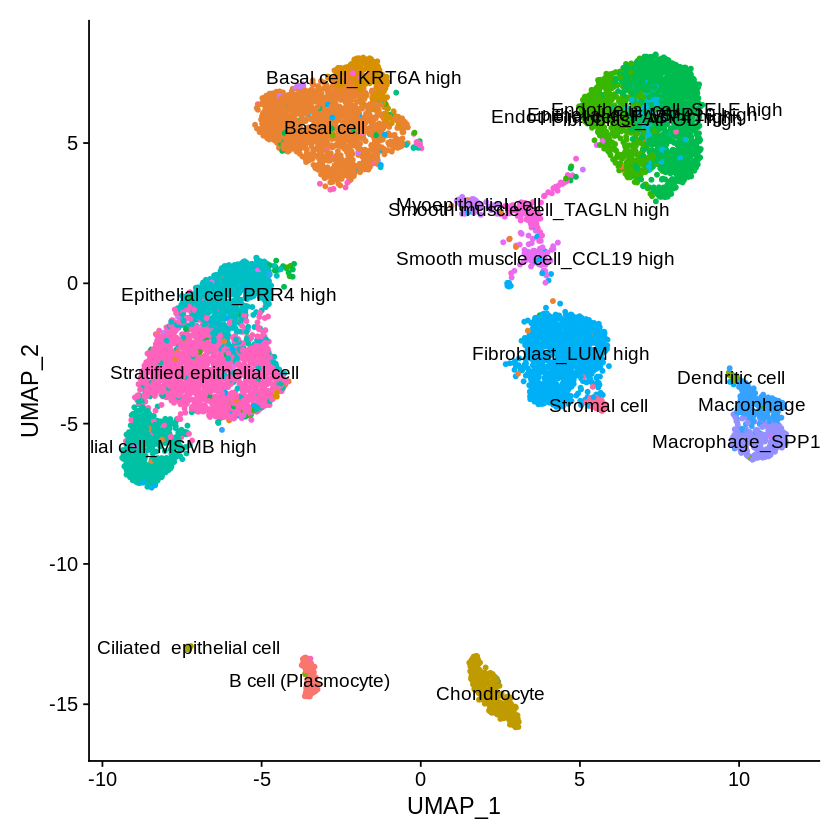

In [13]:
p_umap2

In [14]:
table(dataobj@meta.data$cell_cluster)


          B cell (Plasmocyte)                    Basal cell 
                          172                          1561 
        Basal cell_KRT6A high                   Chondrocyte 
                          300                           409 
    Ciliated  epithelial cell                Dendritic cell 
                           22                            34 
  Endothelial cell_FABP4 high    Endothelial cell_SELE high 
                          635                          1344 
   Epithelial cell_MMP10 high     Epithelial cell_MSMB high 
                           48                           621 
    Epithelial cell_PRR4 high          Fibroblast_APOD high 
                          873                            82 
          Fibroblast_LUM high                    Macrophage 
                         1226                           242 
         Macrophage_SPP1 high            Myoepithelial cell 
                          239                           133 
Smooth muscle cell_CCL1

# Clustering

In [15]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [16]:
dataobj <- FindClusters(dataobj, resolution = 1, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9949
Number of edges: 383421

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8561
Number of communities: 16
Elapsed time: 1 seconds


In [18]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

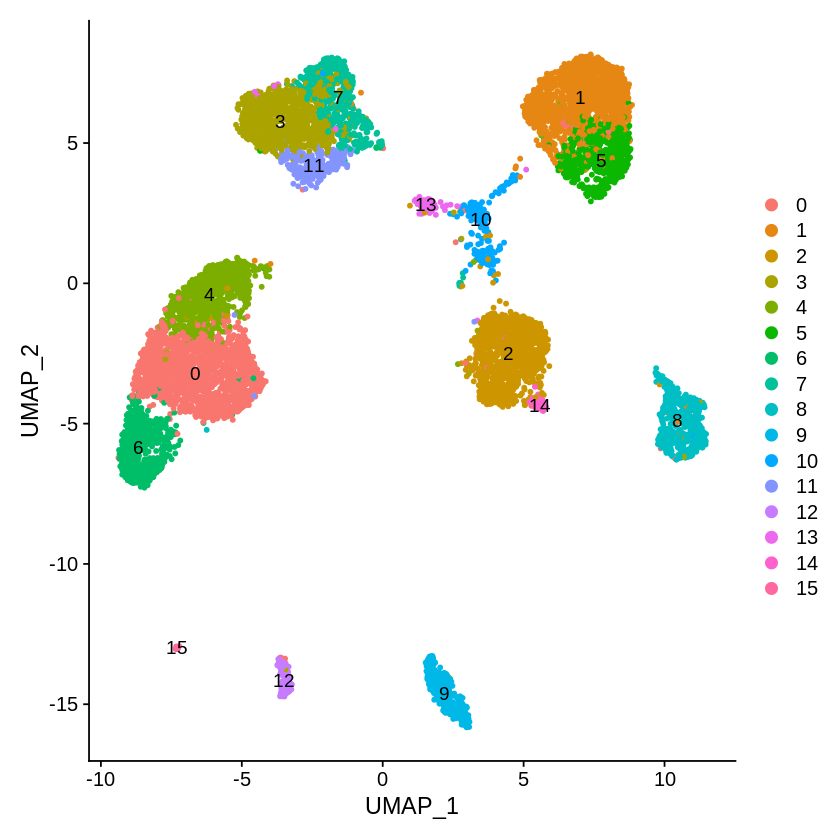

In [19]:
p_umap

# Finding cluster markers 

In [20]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



# Annotation

In [60]:
dataobj.markers[dataobj.markers['cluster']==15,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
C1orf194,0,3.395122,0.857,0.001,0,15,C1orf194
CAPSL,0,2.995983,0.810,0.000,0,15,CAPSL
C20orf85,0,2.981649,0.857,0.000,0,15,C20orf85
TMEM190,0,2.833407,0.762,0.001,0,15,TMEM190
PIFO,0,2.809524,0.667,0.004,0,15,PIFO
TSPAN19,0,2.794521,0.524,0.001,0,15,TSPAN19
FAM183A,0,2.694166,0.667,0.002,0,15,FAM183A
SNTN,0,2.693034,0.714,0.001,0,15,SNTN
C9orf24,0,2.677281,0.714,0.001,0,15,C9orf24


In [59]:
dataobj.markers[dataobj.markers['gene']=="CCDC78",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCDC78,0,1.417261,0.286,0,0,15,CCDC78


In [61]:
new.cluster.ids <- c('Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19',#0
                     'Bronchi-Epithelial tissue-Endothelial cell-ACKR1 SELE',
                     'Bronchi-Connective tissue-Fibrocyte-DCN LUM',
                     'Bronchi-Epithelial tissue-Basal cell-KRT15 DST',
                     'Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19',
                     'Bronchi-Epithelial tissue-Endothelial cell-ACKR1 FABP4',#5
                     'Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19',
                     'Bronchi-Epithelial tissue-Basal cell-KRT15 SERPINB3',
                     'Bronchi-Connective tissue-Macrophage-C1QB CD83',
                     'Bronchi-Cartiage tissue-Chondrocyte-COL2A1 CYTL1',
                     'Bronchi-Muscle tissue-Smooth muscle cell-ACTA2 MYL9',#10
                     'Bronchi-Epithelial tissue-Basal cell-CYR61 KRT15',
                     'Bronchi-Connective tissue-B cell-IGHG3 CD79A',
                     'Bronchi-Muscle tissue-Smooth muscle cell-ACTA2 MYL9',
                     'Bronchi-Connective tissue-Fibrocyte-DCN LUM',
                     'Bronchi-Epithelial tissue-Ciliated columnar cell-CCDC78 C11orf88'#15
                    )

In [62]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

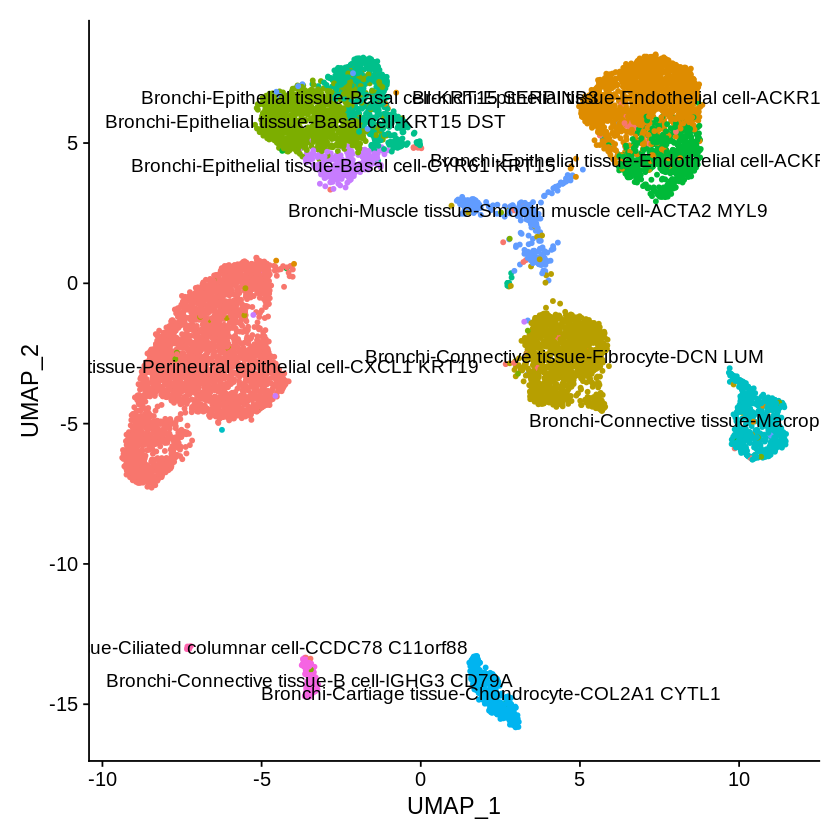

In [63]:
plot

In [64]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)

In [100]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [65]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [66]:
dataobj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age,cell_cluster,RNA_snn_res.1,seurat_clusters,hcad.label
,<fct>,<dbl>,<int>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AdultTrachea_2.AAAACGAAAGTTCCGCTA,AdultTrachea,1506,916,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Endothelial cell_SELE high,5,5,Bronchi-Epithelial tissue-Endothelial cell-ACKR1 FABP4
AdultTrachea_2.AAAACGAACCTAGTCCCG,AdultTrachea,529,329,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Macrophage,8,8,Bronchi-Connective tissue-Macrophage-C1QB CD83
AdultTrachea_2.AAAACGAACGCCCAACAA,AdultTrachea,646,458,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Stratified epithelial cell,0,0,Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19
AdultTrachea_2.AAAACGACACCCGATCTT,AdultTrachea,519,369,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Fibroblast_LUM high,2,2,Bronchi-Connective tissue-Fibrocyte-DCN LUM
AdultTrachea_2.AAAACGACACCCGCCCTC,AdultTrachea,664,410,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Epithelial cell_PRR4 high,4,4,Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19
AdultTrachea_2.AAAACGACACCCGTATAC,AdultTrachea,1206,739,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Macrophage,8,8,Bronchi-Connective tissue-Macrophage-C1QB CD83
AdultTrachea_2.AAAACGACACCCTAGCAT,AdultTrachea,1128,636,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Chondrocyte,9,9,Bronchi-Cartiage tissue-Chondrocyte-COL2A1 CYTL1
AdultTrachea_2.AAAACGACACCCTGAAGC,AdultTrachea,1169,794,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Stratified epithelial cell,0,0,Bronchi-Epithelial tissue-Perineural epithelial cell-CXCL1 KRT19
AdultTrachea_2.AAAACGACGAGCGCGTCC,AdultTrachea,571,453,Bronchi,NA,Main trachea,Healthy,AdultTrachea2_46Y,Male,46yr,Basal cell,3,3,Bronchi-Epithelial tissue-Basal cell-KRT15 DST


In [67]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [68]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [69]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

In [70]:
dataobj

An object of class Seurat 
24990 features across 9949 samples within 1 assay 
Active assay: RNA (24990 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap